# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [1]:
from dolphin.processor import Processor 
import dolphin
print(dolphin.processor.__file__)

processor = Processor('../io_directory_example/')


/Users/chinyi/Desktop/dolphin/dolphin/processor/__init__.py


### Run a model by calling the  `swim()` method

In [2]:
processor.swim(lens_name='lens_system3', model_id='example3', log=False)

Computing the PSO ...
10
Max iteration reached! Stopping.
-12.854179642583686 reduced X^2 of best position
-216856.4376602081 logL
33741 effective number of data points
[{'theta_E': 1.0914051171718417, 'gamma': 2.0, 'e1': 0.042025436507098224, 'e2': 0.07134401025119022, 'center_x': 0.09669876446806723, 'center_y': -0.03878403511591583}, {'gamma_ext': 0.0011273754736878443, 'psi_ext': -0.029496358926069152, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'n_max': 4, 'beta': 0.1499674564487787, 'center_x': -0.2830708612729338, 'center_y': -0.05623956046490921}, {'amp': 1, 'n_max': 4, 'beta': 0.14929434670525402, 'center_x': -0.2830708612729338, 'center_y': -0.05623956046490921}] source result
[{'amp': 1, 'R_sersic': 0.21559186357726356, 'n_sersic': 4.0, 'e1': 0.0336459217398056, 'e2': 0.09936639885940121, 'center_x': 0.04112018976216236, 'center_y': -0.036403343785083676}, {'amp': 1, 'R_sersic': 0.18704783493914384, 'n_sersic': 3.5, 'e1': 0.04406258287618806, 'e2': 0.03441777533769868, '

  0%|          | 0/10 [00:00<?, ?it/s]/Users/chinyi/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10/10 [02:09<00:00, 12.92s/it]

Computing the MCMC...
Number of walkers =  52
Burn-in iterations:  0
Sampling iterations (in current run): 10
141.62903690338135 time taken for MCMC sampling


## Let's check the output

In [3]:
from dolphin.analysis.output import Output

output = Output('../io_directory_example/')

-7.247576767915291 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  11.115613561488473
reduced chi^2 of data  1 =  3.379539974342115


/Users/chinyi/Desktop/lenstronomy/lenstronomy/Plots/model_band_plot.py:41: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/Users/chinyi/Desktop/lenstronomy/lenstronomy/Plots/model_band_plot.py:57: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cubehelix"))
  cmap.set_bad(color='k', alpha=1.)
/Users/chinyi/Desktop/lenstronomy/lenstronomy/Plots/model_band_plot.py:58: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cubehelix"))
  cmap.set_under('k')
/Users/chinyi/Desktop/lenstronomy/lenstronomy/Plots/mode

-7.247576767915291 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  11.115613561488473
reduced chi^2 of data  1 =  3.379539974342115


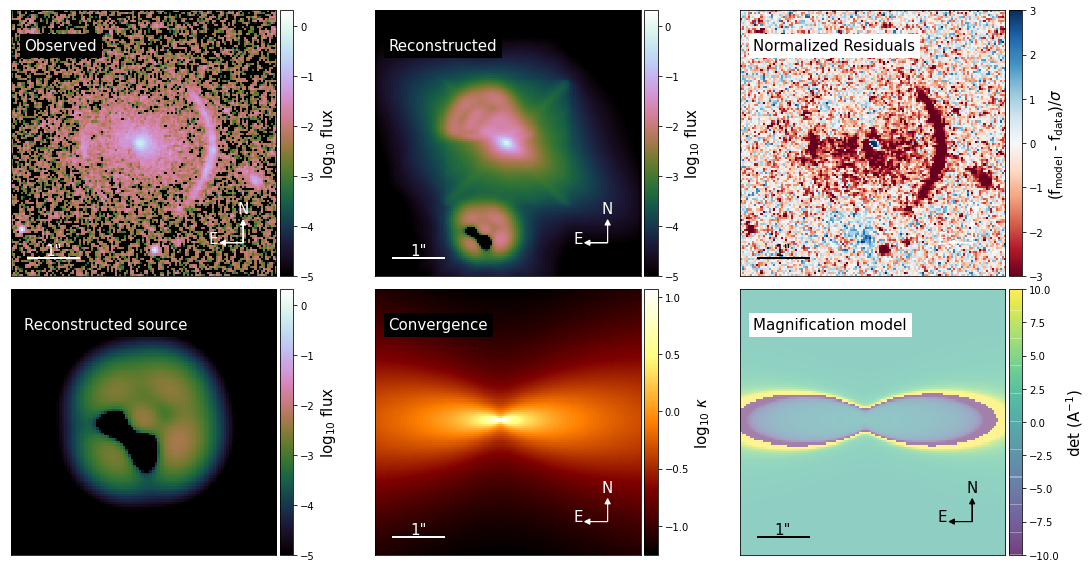

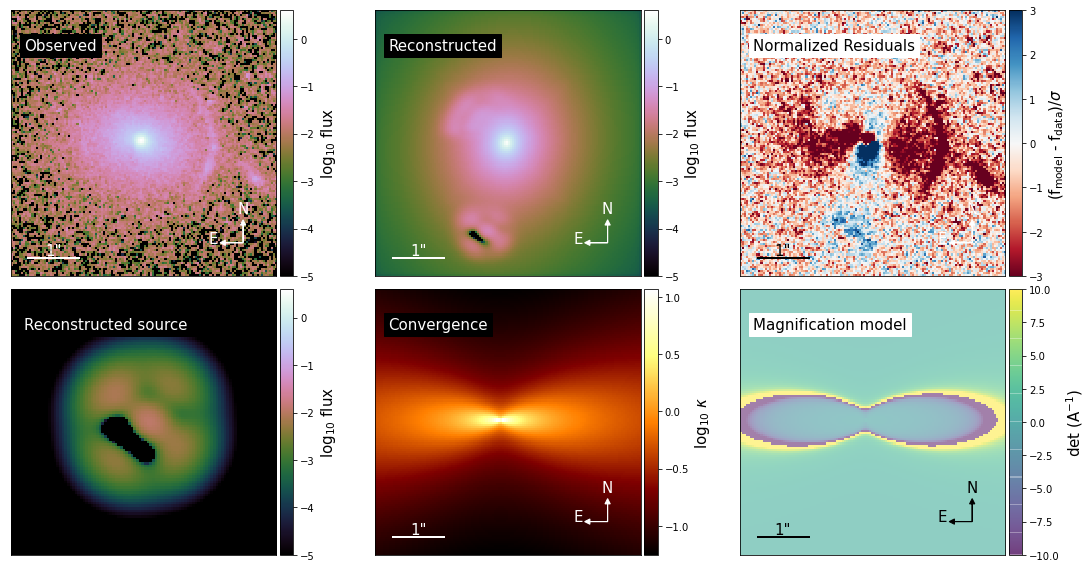

In [4]:
fig = output.plot_model_overview(lens_name='lens_system3', model_id='example3',band_index=0)
fig2 = output.plot_model_overview(lens_name='lens_system3', model_id='example3',band_index=1)

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [5]:
output.load_output(lens_name='lens_system3', model_id='example3')

output.kwargs_result

{'kwargs_lens': [{'theta_E': 0.7396894257416292,
   'gamma': 1.9623171919272788,
   'e1': 0.3764342987945212,
   'e2': -0.0015360544444057364,
   'center_x': 0.17162669058179802,
   'center_y': 0.01937848146663279},
  {'gamma_ext': 0.002275230108308147,
   'psi_ext': -0.04512376190618837,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 4,
   'beta': 0.1449085430813978,
   'center_x': 0.4293927189365702,
   'center_y': -0.5579055075537752},
  {'amp': 1,
   'n_max': 4,
   'beta': 0.15093995832040866,
   'center_x': 0.4293927189365702,
   'center_y': -0.5579055075537752}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 0.10248762522734967,
   'n_sersic': 4.0,
   'e1': 0.1201228573190339,
   'e2': -0.04297704785228884,
   'center_x': 0.051056525412157626,
   'center_y': -0.017419659357081854},
  {'amp': 1,
   'R_sersic': 0.16636226928115316,
   'n_sersic': 3.5,
   'e1': 0.26064855417523913,
   'e2': 0.42416764244813,
   'center_x': 0.051056525412157626,
   'cente

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [6]:
output.model_settings

{'system_name': 'SL2SJ0219-0829',
 'band': ['F475X', 'F600LP'],
 'pixel_size': 0.04,
 'model': {'lens': ['SPEP', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE', 'SERSIC_ELLIPSE'],
  'source_light': ['SHAPELETS']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0},
   '1': {'n_sersic': 3.5}}},
 'source_light_option': {'n_max': [4, 4]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 10, 'num_iteration': 10},
  'sampling': True,
  'sampler': 'MCMC',
  'mcmc_settings': {'burnin_step': 0,
   'iteration_step': 10,
   'walker_ratio': 2}},
 'numeric_option': {'supersampling_factor': [2]}}